# KMeans using pure Python

The purpose of this notebook is to show how to perform K-Means using Python only. Why? Just for fun. 

### 1) Get some data, let's use the Iris dataset for this example.

In [1]:
import requests
import random
import math
r = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
assert r.ok, r.text
raw_data = r.text
labels = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}

### 2) Process the training data

Remember this is a un-supervised algorithm, but let's keep the label just for plots. m

In [2]:
X = []
y = []
for line in raw_data.split("\n"):
    items = line.split(",")
    if len(items) == 5:
        items[-1] = labels[items[-1]]
        X.append(list(map(float, items[:2])))
        y.append(items[-1])

### 3) Define all the functions

In [3]:
def normalize(X):
    """
    This will normalize the training data to contain values from 0-1.
    src: https://stats.stackexchange.com/questions/70801/how-to-normalize-data-to-0-1-range
    """
    m, n = len(X), len(X[0])
    min_ = [math.inf] * n
    max_ = [-math.inf] * n
    for i, row in enumerate(X):
        min_ = [min(min_[j], row[j]) for j in range(n)]
        max_ = [max(max_[j], row[j]) for j in range(n)]
    for i in range(m):
        for j in range(n):
            X[i][j] = (X[i][j] - min_[j]) / (max_[j] - min_[j])
    return X

In [4]:
def edist(pv, qv):
    """
    The Euclidean distance between two vectors.
    src: https://en.wikipedia.org/wiki/Euclidean_distance
    """
    res = 0
    assert len(pv) == len(qv), "Dimensions of P and Q must match"
    n = len(pv)
    res = 0
    for i in range(n):
        p = pv[i]
        q = qv[i]
        res += (p - q)**2
    return res**(1/2)

def avgcentroid(X, C, kidx):
    """
    This function averages the points assiged to centroid k.
    """
    m, n = len(X), len(X[0])
    res = [0] * n
    kpoints = 0
    for i, row in enumerate(X):
        if C[i] == kidx:
            kpoints += 1
            for i in range(n):
                res[i] += row[i]
    if not kpoints:
        return [random.random() for _ in range(n)]
    for i in range(n):
        res[i] /= kpoints
    return res

def kmeans(k, X, iters=1000):
    """
    Iterative implementation of K-Means, 
    we could implement a threshold but we'll be moving this code to run in GPU soon.
    """
    m, n = len(X), len(X[0])
    K = [[random.random() for _ in range(n)] for _ in range(k)]
    C = [0] * len(X)
    while iters > 0:
        for i, row in enumerate(X):
            distances = [edist(u, row) for u in K]
            C[i] = distances.index(min(distances))
        for kidx in range(k):
            K[kidx] = avgcentroid(X, C, kidx)
        iters -= 1
    return K

def predict(K, X):
    """
    Predict using the centroids obtained from training.
    """
    y_hat = [0] * len(X)
    for i, row in enumerate(X):
        distances = [edist(u, row) for u in K]
        y_hat[i] = distances.index(min(distances))
    return y_hat

### 3) Explore the dataset

Text(0, 0.5, 'Sepal Width')

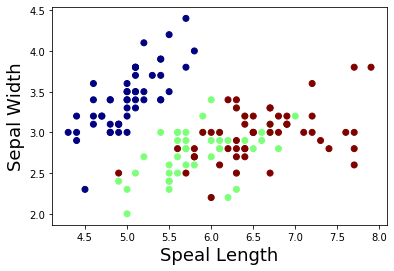

In [5]:
import matplotlib.pyplot as plt
import numpy as np
npX = np.array(X)
plt.scatter(npX[:,0], npX[:,1], c=y, cmap='jet')
plt.xlabel('Speal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

### 4) Train without normalization

Notice is pretty bad, that's why you need to normalize the data ;) 

In [6]:
K = kmeans(3, X)
y_hat = predict(K, X)

Text(0, 0.5, 'Sepal Width')

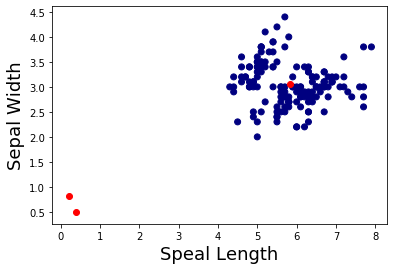

In [7]:
import matplotlib.pyplot as plt
import numpy as np
npX = np.array(X)
npK = np.array(K)
plt.scatter(npX[:,0], npX[:,1], c=y_hat, cmap='jet')
plt.scatter(npK[:,0], npK[:,1], color='red')
plt.xlabel('Speal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [8]:
plt.clf()

<Figure size 432x288 with 0 Axes>

### 5) Train with normalization

This is much better.

In [9]:
X = normalize(X)
K = kmeans(3, X)
y_hat = predict(K, X)

Text(0, 0.5, 'Sepal Width')

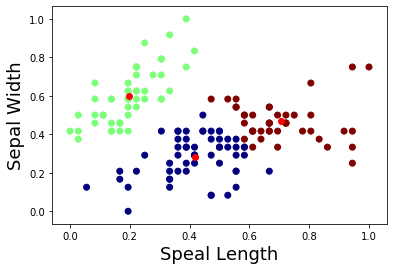

In [10]:
import matplotlib.pyplot as plt
import numpy as np
npX = np.array(X)
npK = np.array(K)
plt.scatter(npX[:,0], npX[:,1], c=y_hat, cmap='jet')
plt.scatter(npK[:,0], npK[:,1], color='red')
plt.xlabel('Speal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [11]:
plt.clf()

<Figure size 432x288 with 0 Axes>

### Implementation Details
![KMeans](Kmeans.png)